## Simple MLP with architecture of 2-2-1

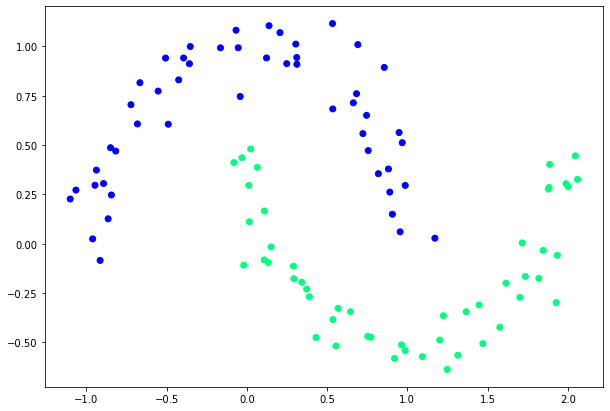

In [5]:
# Binary classification problem
# simple MLP neural network with hidden layer, RMSE loss and sigmoid activation

import numpy as np
import sklearn.datasets as dts
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

# derivative of sigmoid / logistic
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

# debug=True
debug=False
plotonly=True
# plotonly=False

# make dataset
np.random.seed(0)
feature_set, labels = dts.make_moons(100, noise=0.10)

# plot the data
if(plotonly):
    plt.figure(figsize=(10,7))
    plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)
    plt.show()
    exit


In [7]:

labels = labels.reshape(100, 1)

# Set seed to gen random numbers so that same RN are generated each time
# np.random.seed(42)

wh = np.random.rand(len(feature_set[0]),4)
wo = np.random.rand(4,1)
bias = np.random.rand(1)
lr = 0.5

# train the NN
for epoch in range(10):
    # forward feed input -> hidden layer 1 (In -> HL1)
    XWh = np.dot(feature_set,wh)
    Zh  = sigmoid(XWh)

    # forward hidden layer 1 -> output (HL1 -> Out)
    XWo = np.dot(Zh,wo)
    Zo = sigmoid(XWo)

    if(debug):
        print("feature_set.shape = ",feature_set.shape) # (u,n)
        print("labels.shape = ",labels.shape)           # (u,1)
        print("XWh.shape    = ",XWh.shape)     # (u,d)
        print("Zh.shape     = ",Zh.shape)      # (u,d)
        print("XWo.shape    = ",XWo.shape)     # (u,1)
        print("Zo.shape     = ",Zo.shape)      # (u,1)

    # backpropagation phase 1 (Out -> HL1)
    error = Zo - labels
    RMSE = np.sqrt(0.5 * (np.power(error,2)))
    #print("Sigma error = ",RMSE.sum())

    dcost_by_dZo = error
    dZo_by_dXWo = sigmoid_der(XWo)
    dXWo_by_dwo = Zh
    Zo_Delta = dcost_by_dZo * dZo_by_dXWo
    dcost_by_dwo = np.dot(Zh.T,Zo_Delta)

    if(debug):
        print("error        = ",error.shape)            # (u,1)
        print("dcost_by_dZo = ",dcost_by_dZo.shape)     # (u,1)
        print("dZo_by_dXWo  = ",dZo_by_dXWo.shape)      # (u,1)
        print("dXWo_by_dwo  = ",dXWo_by_dwo.shape)      # (u,d)
        print("Zo_Delta     = ",Zo_Delta.shape)         # (n,1)
        print("dcost_by_dwo = ",dcost_by_dwo.shape)

    # backpropagation phase 2 (HL1 -> In)
    #dcost_by_dwh = dcost_by_dZh * dZh_by_dXWh * dXWh_by_dwh
    #dcost_by_dZh = dcost_by_dXWo * dXWo_by_dZh
    dcost_by_dXWo = Zo_Delta
    dXWo_by_dZh = wo
    dcost_by_dZh = np.dot(Zo_Delta,wo.T)
    dcost_by_dXWh = dcost_by_dZh * sigmoid_der(XWh)
    dcost_by_dWh = np.dot(feature_set.T,dcost_by_dXWh)

    if(debug):
        print("backpropagation phase II")
        print("dcost_by_dXWo = ",dcost_by_dXWo.shape)   # (n,1)
        print("dXWo_by_dZh   = ",dXWo_by_dZh.shape)     # (d,1)
        print("dcost_by_dZh  = ",dcost_by_dZh.shape)    # (n,1)
        print("wo  = ",wo.shape)    # (n,1)
        print("dcost_by_dXWh  = ",dcost_by_dXWh.shape)    # (n,1)
        print("dcost_by_dWh  = ",dcost_by_dWh.shape)    # (n,1)
        print("Zh = ",Zh.shape)

    # update weights
    wh -= lr * dcost_by_dWh
    wo -= lr * dcost_by_dwo
print("wh,wo = ",wh," ",wo)


wh,wo =  [[-0.18853461 -1.0983699  -1.037495    0.40463482]
 [-0.58447423  2.66862364  0.23530764 -2.48933712]]   [[ 0.99179387]
 [-3.33584331]
 [-0.0207993 ]
 [ 2.96099861]]
